In [36]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import warnings 
warnings.filterwarnings('ignore')

# DATA GATHERING

In [37]:
df=pd.read_csv(r'C:\Users\user\Downloads\ecommerce_dataset.csv')
df.head(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134


# EDA- Read and explore the data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [39]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


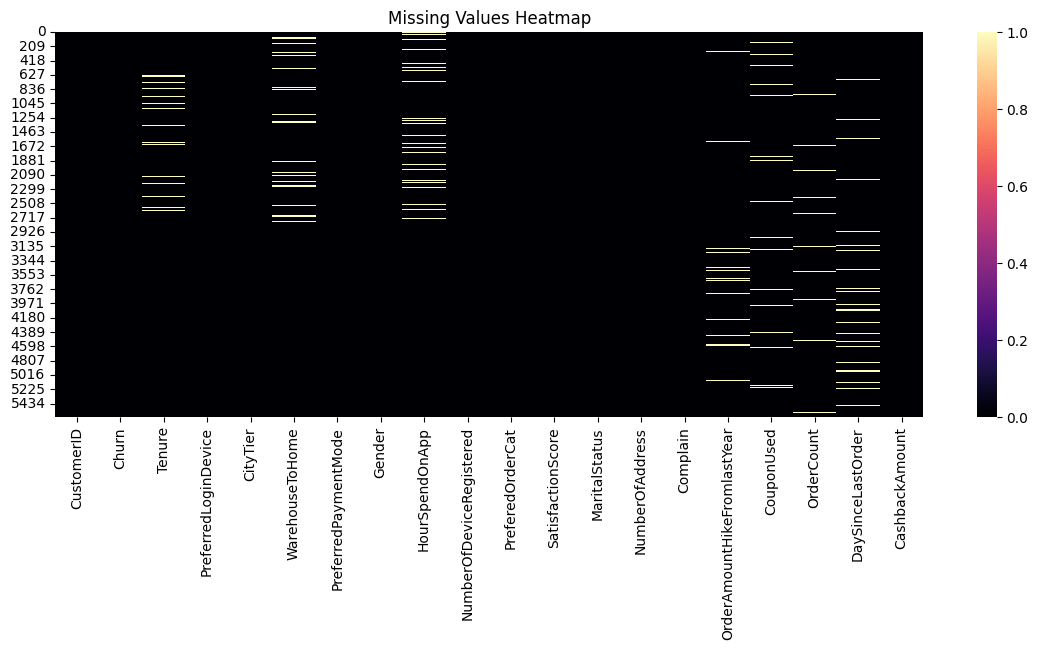

In [40]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

In [41]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [42]:
r=df.isna().sum()*100/len(df)
r

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

## Null value imputation

In [43]:
num_col=['HourSpendOnApp','DaySinceLastOrder','OrderCount','CouponUsed',
                  'OrderAmountHikeFromlastYear','WarehouseToHome','Tenure']

for col in list(num_col):
    df[col].fillna(df[col].median(),inplace= True)


In [44]:
df.isna().sum().sum()

np.int64(0)

In [45]:
#checking unique values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('')

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

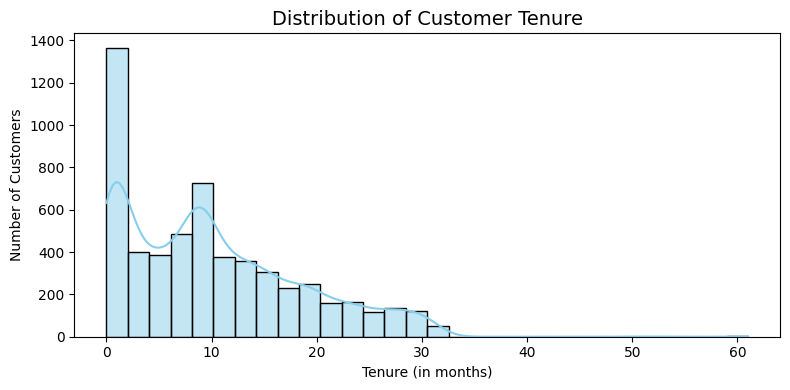

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Tenure', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Customer Tenure', fontsize=14)
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('Distribution of Customer Tenure')
plt.show()


In [47]:
df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [48]:
# as phone and mobile phone are same, we'll merge them
category_mapp={'Phone':'Mobile Phone'}
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace(category_mapp)
df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [49]:
df.replace({"PreferredLoginDevice":{'Mobile Phone':0,'Computer':1}},inplace= True)
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,0,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,0,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,0,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120


In [50]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [51]:
# as credit card and CC are same ,let's merge them
category_map={'CC':'Credit Card'}
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace(category_map)
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64

In [52]:
# as cash on delivery and COD are same,let's merge them too.
category_map={'COD':'Cash on Delivery'}
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace(category_map)
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [53]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

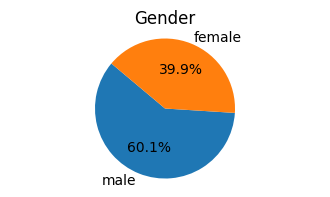

In [54]:
labels=['male','female']
plt.figure(figsize=(4,2))
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%', startangle=140,labels=labels)
plt.title("Gender")
plt.axis('equal')
plt.show()

In [55]:

df.replace({'Gender':{'Male':0,'Female':1}}, inplace=True)
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,0,3,6.0,Debit Card,1,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,0,1,8.0,UPI,0,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,0,1,30.0,Debit Card,0,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120


In [56]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [57]:
category_map={'Mobile':'Mobile Phone'}
df['PreferedOrderCat']=df['PreferedOrderCat'].replace(category_map)
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [58]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [59]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,0,3,6.0,Debit Card,1,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,0,1,8.0,UPI,0,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,0,1,30.0,Debit Card,0,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,0,3,15.0,Debit Card,0,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,0,1,12.0,Credit Card,0,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130


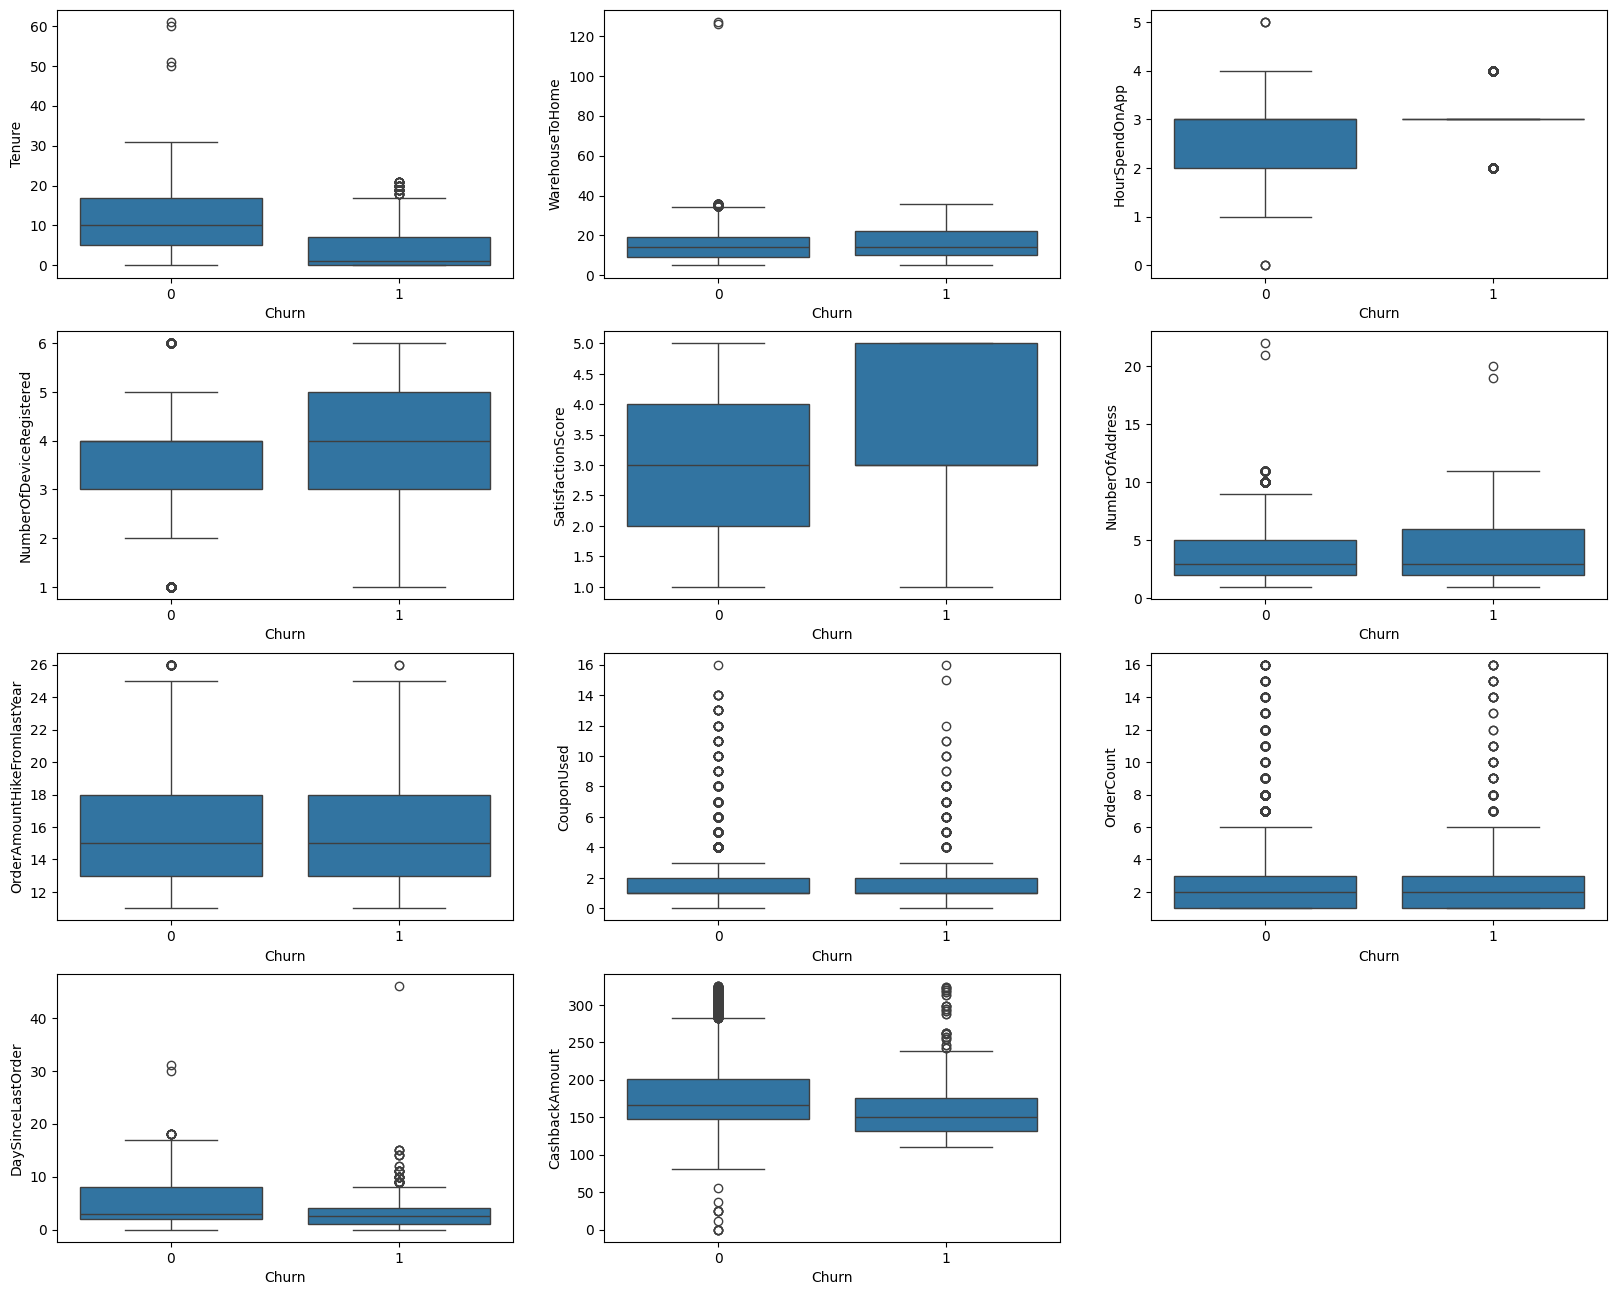

In [60]:
#Visualizing numerical variables
plt.figure(figsize=(20, 16))
plt. subplot(4,3,1)
sns.boxplot(x = 'Churn', y = 'Tenure', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'Churn', y = 'WarehouseToHome', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'Churn', y = 'HourSpendOnApp', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'Churn', y = 'NumberOfDeviceRegistered', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'Churn', y = 'SatisfactionScore', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'Churn', y = 'NumberOfAddress', data = df)
plt.subplot(4,3,7)
sns. boxplot(x = 'Churn', y = 'OrderAmountHikeFromlastYear', data = df)
plt.subplot(4,3,8)
sns. boxplot(x = 'Churn', y = 'CouponUsed', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'Churn', y = 'OrderCount', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'Churn', y = 'DaySinceLastOrder', data = df)
plt.subplot(4,3,11)
sns.boxplot(x = 'Churn', y = 'CashbackAmount', data = df)
plt.show()

# Create features from the data

In [61]:
catergorical_features= ["PreferredPaymentMode","PreferedOrderCat","MaritalStatus"]

In [62]:
numerical_features=['CustomerID','Tenure', 'PreferredLoginDevice', 'CityTier','WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore','NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [63]:
df_features=df[catergorical_features + numerical_features +['Churn']]
df_features.head()

,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,Debit Card,Laptop & Accessory,Single,50001,4.0,0,3,6.0,1,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,1
1,UPI,Mobile Phone,Single,50002,9.0,0,1,8.0,0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,1
2,Debit Card,Mobile Phone,Single,50003,9.0,0,1,30.0,0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,1
3,Debit Card,Laptop & Accessory,Single,50004,0.0,0,3,15.0,0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,1
4,Credit Card,Mobile Phone,Single,50005,0.0,0,1,12.0,0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130,1


In [64]:
y = df_features['Churn']
X = df_features.drop('Churn', axis=1)
X = pd.get_dummies(X, dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
features = list(X.columns)


In [65]:
print("Training Features:\n", X_train.head())
print("Training Target:\n", y_train.head())
print("Feature Names:\n", features)


Training Features:
       CustomerID  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
1294       51295    15.0                     0         1             24.0   
3904       53905    18.0                     0         1              9.0   
3523       53524     1.0                     0         1             13.0   
2100       52101    18.0                     0         3             17.0   
4481       54482     5.0                     0         3             14.0   

      Gender  HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
1294       0             2.0                         3                  5   
3904       1             4.0                         2                  1   
3523       0             3.0                         5                  3   
2100       1             2.0                         3                  1   
4481       0             4.0                         4                  1   

      NumberOfAddress  ...  PreferredPaymentMode_E wal

## 🔍 Model Building and Evaluation

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       939
           1       0.73      0.25      0.37       187

    accuracy                           0.86      1126
   macro avg       0.80      0.62      0.65      1126
weighted avg       0.85      0.86      0.83      1126

Confusion Matrix:
 [[922  17]
 [140  47]]
Accuracy: 0.8605683836589698


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("🔹 Decision Tree Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Classifier Results
Accuracy: 0.9484902309058615
[[910  29]
 [ 29 158]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       939
           1       0.84      0.84      0.84       187

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126



In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Classifier Results
Accuracy: 0.9635879218472468
[[938   1]
 [ 40 147]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.99      0.79      0.88       187

    accuracy                           0.96      1126
   macro avg       0.98      0.89      0.93      1126
weighted avg       0.96      0.96      0.96      1126



In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("🔹 KNN Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔹 KNN Classifier Results
Accuracy: 0.8134991119005328
[[904  35]
 [175  12]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       939
           1       0.26      0.06      0.10       187

    accuracy                           0.81      1126
   macro avg       0.55      0.51      0.50      1126
weighted avg       0.74      0.81      0.76      1126



In [77]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("🔹 SVM Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Classifier Results
Accuracy: 0.8410301953818827
[[936   3]
 [176  11]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       939
           1       0.79      0.06      0.11       187

    accuracy                           0.84      1126
   macro avg       0.81      0.53      0.51      1126
weighted avg       0.83      0.84      0.78      1126



In [78]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.8606
Decision Tree: 0.9485
Random Forest: 0.9636
KNN: 0.8135
SVM: 0.8410


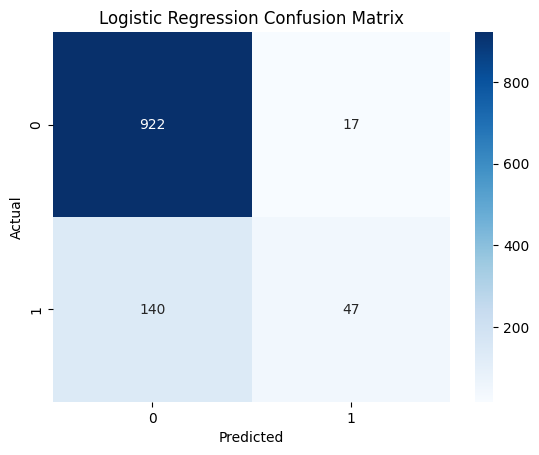

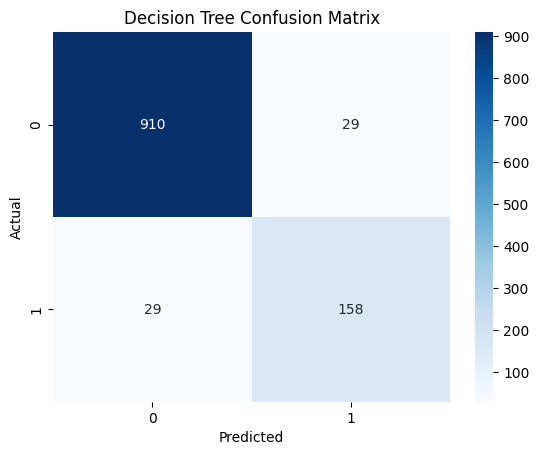

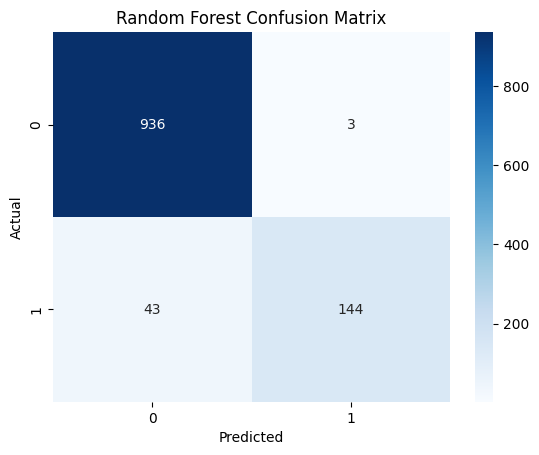

In [86]:
# Confusion matrix function
def plot_conf_matrix(y_true, y_preds, model_name):
    cm = confusion_matrix(y_true, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plotting all
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


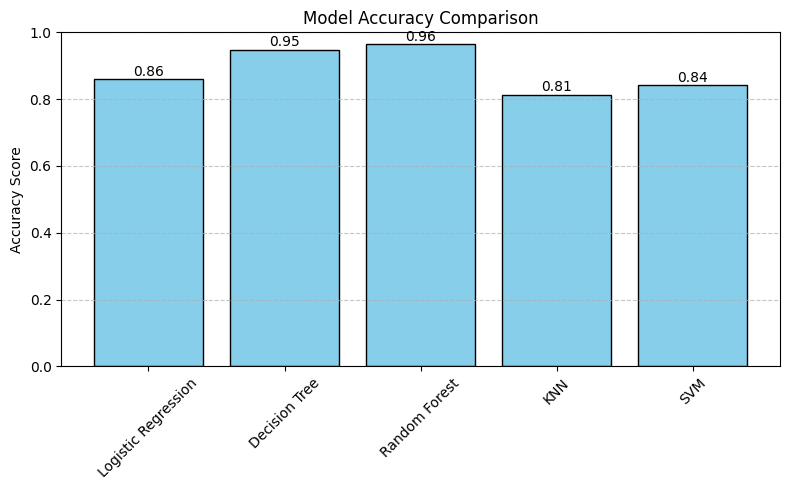

In [87]:
import matplotlib.pyplot as plt

# Plotting model accuracies
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')

# Show accuracy on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


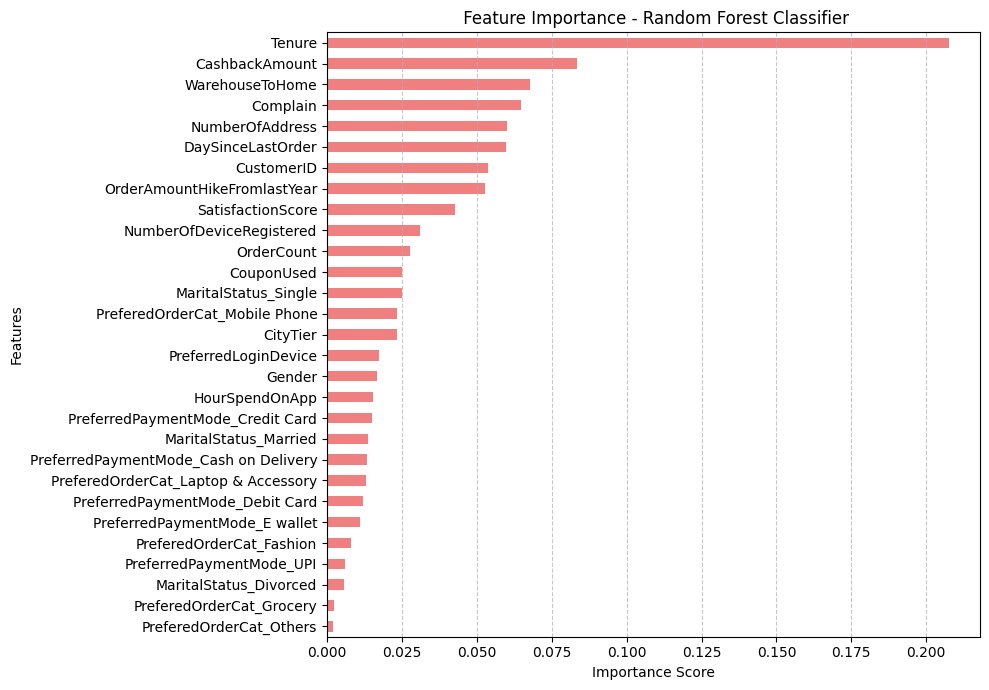

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


# Get feature importance from Random Forest
importances = model_rf.feature_importances_ 
features_df = pd.Series(importances, index=features).sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 7))
features_df.plot(kind='barh', color='lightcoral')
plt.title(' Feature Importance - Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [89]:
best_model = max(results, key=results.get)
print(f"\n🔍 Best Model Based on Accuracy: {best_model} ({results[best_model]:.2f})")

print("\n💡 Business Insight:")
print(f"- The {best_model} model performs the best and can be used for predicting which customers are likely to churn.")
print("- This allows the business to take preventive steps and retain valuable customers.")



🔍 Best Model Based on Accuracy: Random Forest (0.96)

💡 Business Insight:
- The Random Forest model performs the best and can be used for predicting which customers are likely to churn.
- This allows the business to take preventive steps and retain valuable customers.
